In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
get_transforms?

In [5]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [6]:
np.random.seed(42)


In [7]:
# from pathlib import Path
# path = Path("train/")

# print(path)
# for c in data.classes:
#     print(c)
#     verify_images(path/c, delete=True)

In [8]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [9]:
src

LabelLists;

Train: LabelList (65934 items)
x: ImageList
Image (3, 500, 375),Image (3, 500, 375),Image (3, 500, 375),Image (3, 500, 375),Image (3, 375, 500)
y: CategoryList
class-1059,class-1059,class-1059,class-1059,class-1059
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 533, 800),Image (3, 375, 500),Image (3, 2000, 1500),Image (3, 480, 358),Image (3, 500, 375)
y: CategoryList
class-448,class-697,class-204,class-540,class-854
Path: train;

Test: None

In [10]:
data = src.transform(tfms,size=256).databunch(bs=8).normalize(imagenet_stats)

In [11]:
data.c

45

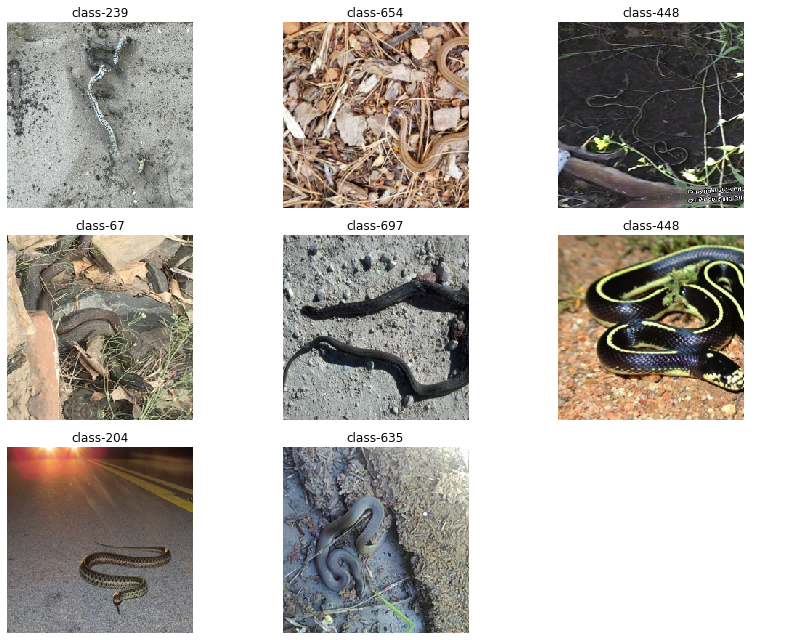

In [12]:
data.show_batch(rows=3, figsize=(12,9))

In [13]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy, FBeta(beta=1)])


In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


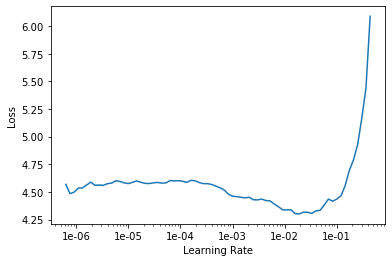

In [15]:
learn.recorder.plot()

In [16]:
lr=1e-3

In [17]:
learn.fit_one_cycle(1,1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.701135,1.277909,0.373294,0.626706,0.537358,41:08


D:\toolkits.win\conda\envs\snakes_breed\lib\site-packages\fastai\metrics.py:186: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [18]:
learn.fit_one_cycle(5,slice(1e-6,lr/10))

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.475044,1.243365,0.362131,0.637869,0.556397,40:59
1,1.517421,1.209344,0.354911,0.645089,0.604763,41:12
2,1.438705,1.182077,0.350240,0.649760,0.000000,41:15
3,1.533125,1.155443,0.340654,0.659346,0.625442,41:00
4,1.394926,1.160406,0.341807,0.658193,0.622561,41:09


In [19]:
data = src.transform(tfms,size=512).databunch(bs=4).normalize(imagenet_stats)

In [20]:
learn.data = data

In [25]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
class-1059,class-1059,class-1059,class-1059,class-1059
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
class-448,class-697,class-204,class-540,class-854
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True

In [26]:
learn.fit_one_cycle(2,slice(1e-6,lr/10))

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.566366,1.042125,0.302675,0.697325,0.620677,2:08:33
1,1.611814,1.001398,0.294789,0.705211,0.658788,2:08:40


D:\toolkits.win\conda\envs\snakes_breed\lib\site-packages\fastai\metrics.py:186: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [27]:
interp = ClassificationInterpretation.from_learner(learn)


In [28]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

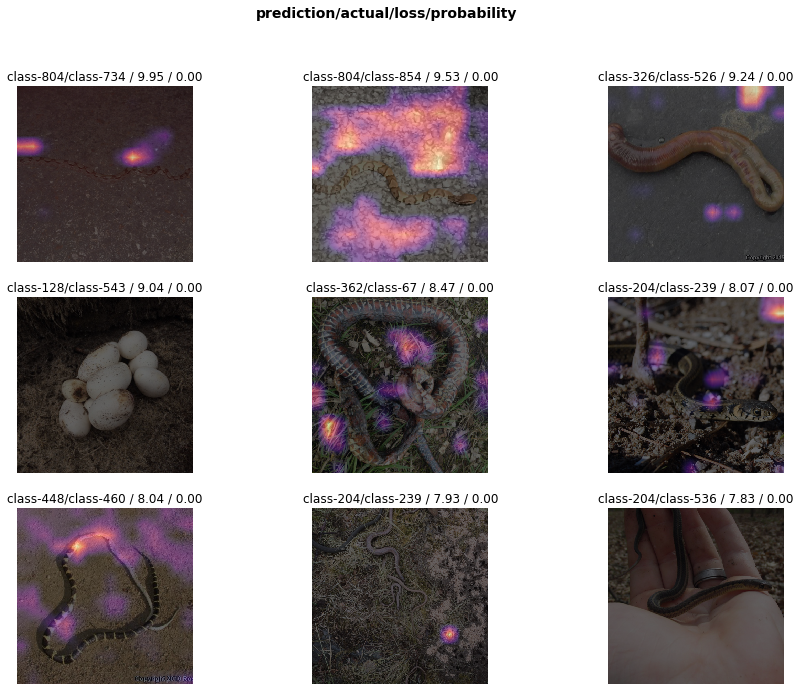

In [29]:
interp.plot_top_losses(9, figsize=(15,11))


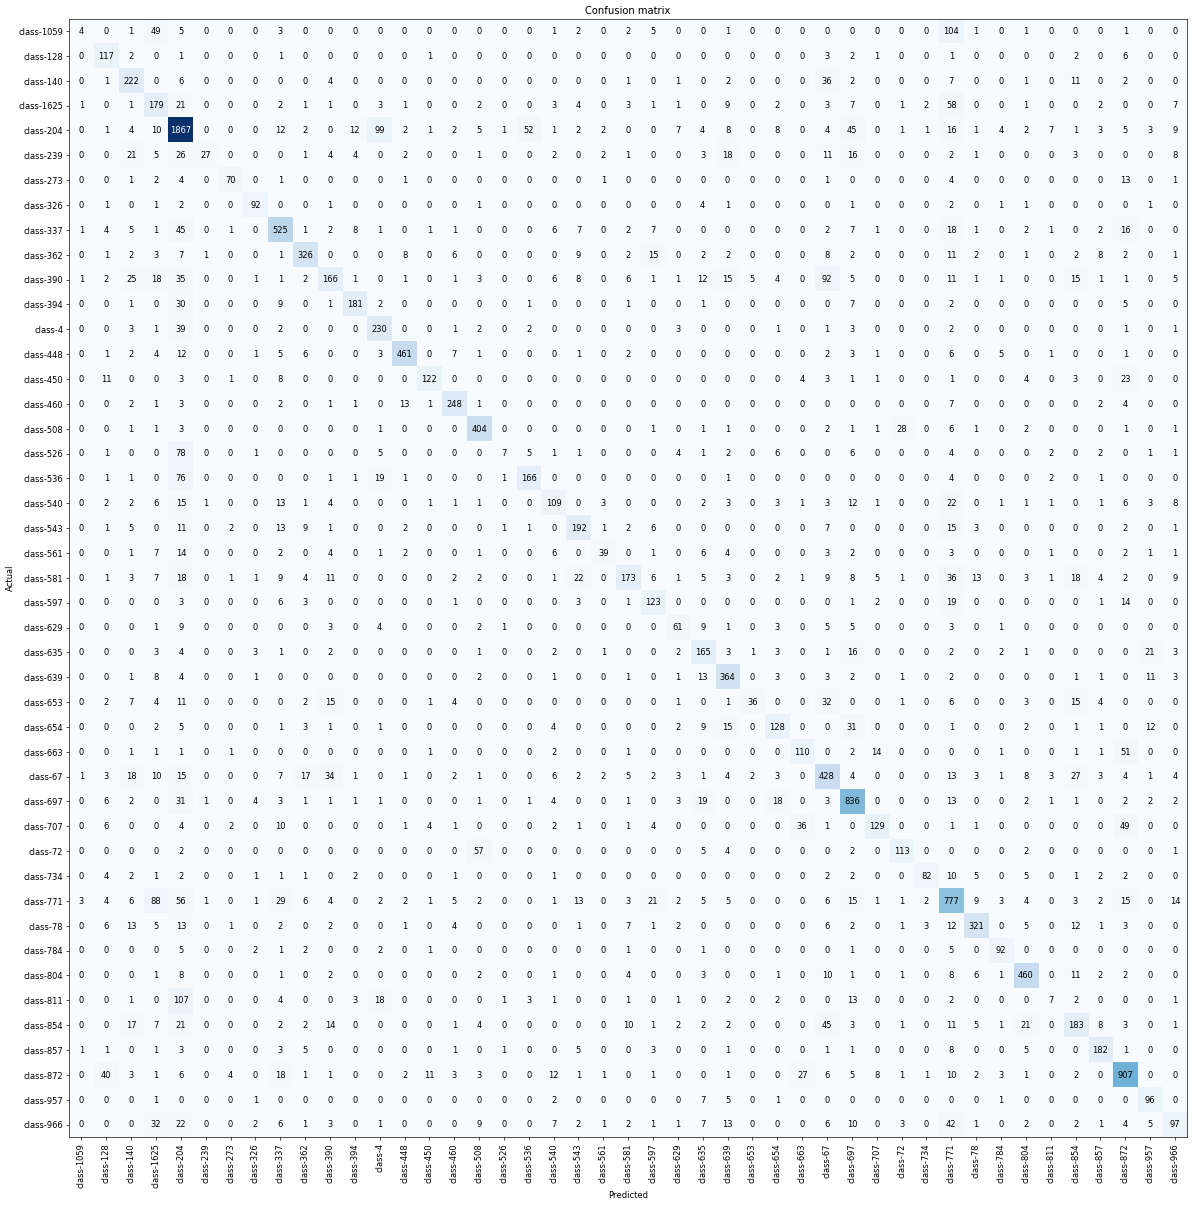

In [32]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)


In [31]:
interp.most_confused(min_val=2)


[('class-811', 'class-204', 107),
 ('class-1059', 'class-771', 104),
 ('class-204', 'class-4', 99),
 ('class-390', 'class-67', 92),
 ('class-771', 'class-1625', 88),
 ('class-526', 'class-204', 78),
 ('class-536', 'class-204', 76),
 ('class-1625', 'class-771', 58),
 ('class-72', 'class-508', 57),
 ('class-771', 'class-204', 56),
 ('class-204', 'class-536', 52),
 ('class-663', 'class-872', 51),
 ('class-1059', 'class-1625', 49),
 ('class-707', 'class-872', 49),
 ('class-204', 'class-697', 45),
 ('class-337', 'class-204', 45),
 ('class-854', 'class-67', 45),
 ('class-966', 'class-771', 42),
 ('class-872', 'class-128', 40),
 ('class-4', 'class-204', 39),
 ('class-140', 'class-67', 36),
 ('class-581', 'class-771', 36),
 ('class-707', 'class-663', 36),
 ('class-390', 'class-204', 35),
 ('class-67', 'class-390', 34),
 ('class-653', 'class-67', 32),
 ('class-966', 'class-1625', 32),
 ('class-654', 'class-697', 31),
 ('class-697', 'class-204', 31),
 ('class-394', 'class-204', 30),
 ('class-771